In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Load and clean the data
df = pd.read_csv('22SevenTweetsCLEAN.csv')

df = df.dropna(subset=['Tweet'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
analyzer = SentimentIntensityAnalyzer()

# Define a function to check if a word is present in a tweet
def check_word_in_tweet(word, tweet):
    word = word.lower()
    tweet = tweet.lower()
    if word in tweet:
        return True
    return False

In [4]:
# Apply check_word_in_tweet to each tweet to create boolean Series
money_mask = df['Tweet'].apply(lambda x: check_word_in_tweet('money', x))
app_mask = df['Tweet'].apply(lambda x: check_word_in_tweet('app', x))

In [5]:
# Use boolean Series to filter sentiment Series
sentiment_my = df[money_mask]['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound']).resample('1D').mean()
sentiment_fr = df[app_mask]['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound']).resample('1D').mean()

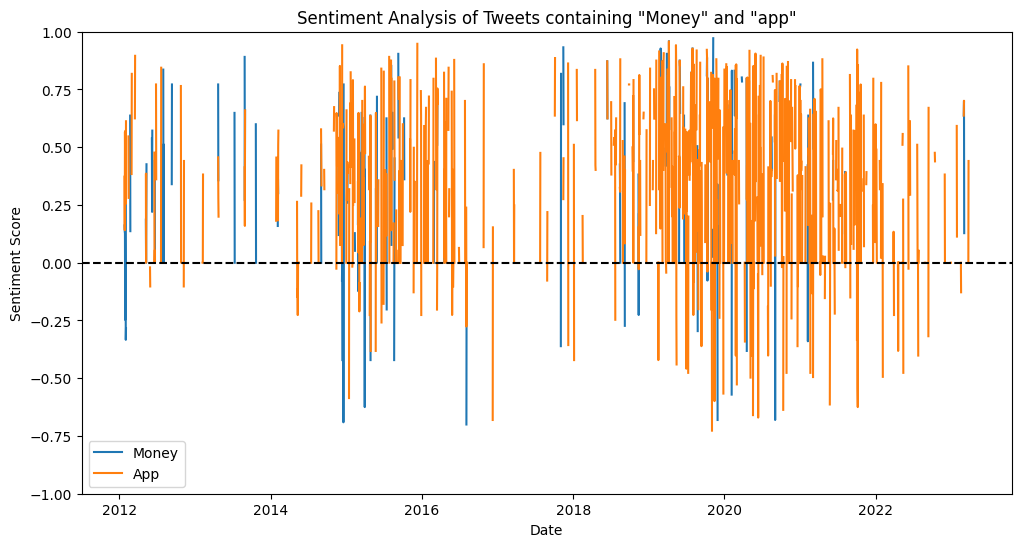

In [6]:
# Plot the sentiment scores
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sentiment_my.index, sentiment_my.values, label='Money')
ax.plot(sentiment_fr.index, sentiment_fr.values, label='App')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_title('Sentiment Analysis of Tweets containing "Money" and "app"')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_ylim([-1, 1])
ax.legend(loc='lower left')
plt.show()


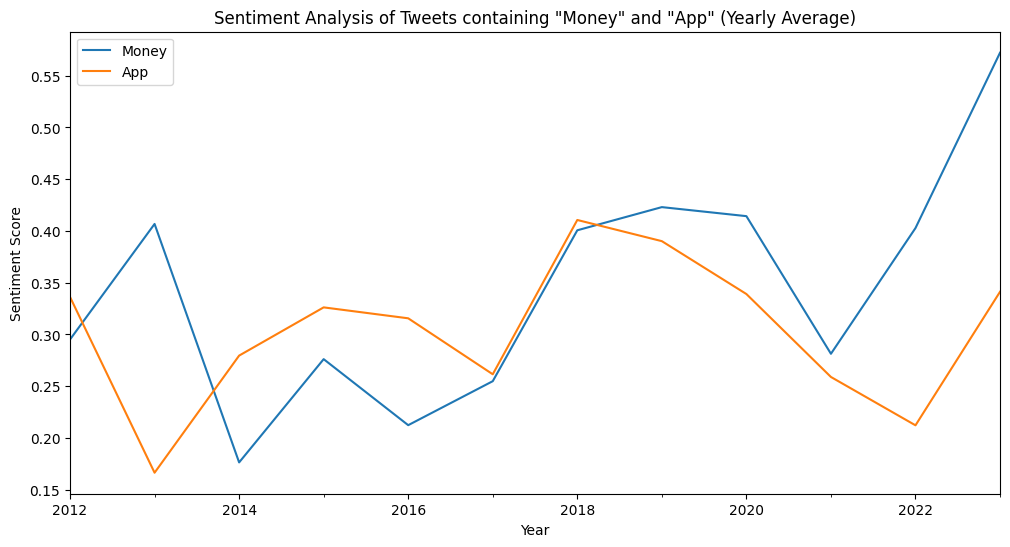

In [7]:
# Create a dataframe with the sentiment scores
sentiment_df = pd.concat([sentiment_my, sentiment_fr], axis=1)
sentiment_df.columns = ['Money', 'App']

# Drop rows where both columns are NaN
sentiment_df.dropna(how='all', subset=['Money', 'App'], inplace=True)

# Group the sentiment scores by year and take the mean value of each variable
sentiment_yearly = sentiment_df.resample('1Y').mean()

# Plot the sentiment scores for each year side by side
fig, ax = plt.subplots(figsize=(12, 6))
sentiment_yearly.plot(ax=ax)
ax.set_title('Sentiment Analysis of Tweets containing "Money" and "App" (Yearly Average)')
ax.set_xlabel('Year')
ax.set_ylabel('Sentiment Score')
plt.show()


In [8]:
# Group the sentiment scores by year
sentiment_yearly = sentiment_df.groupby(sentiment_df.index.year)

# Calculate summary statistics for each year
summary_stats = sentiment_yearly.describe()

# Print the summary statistics for each year
summary_stats

Money                                                                     
     count      mean       std     min       25%       50%       75%     max   
Date                                                                           
2012  50.0  0.295113  0.347676 -0.4536  0.000000  0.280188  0.563375  0.8519  \
2013  14.0  0.406727  0.299675 -0.1027  0.269375  0.417767  0.636300  0.8910   
2014  36.0  0.176360  0.421303 -0.7579  0.000000  0.139500  0.544425  0.8625   
2015  88.0  0.276113  0.340249 -0.6249  0.000000  0.331175  0.547950  0.9042   
2016  29.0  0.212334  0.399765 -0.7003  0.000000  0.318200  0.510600  0.8689   
2017  18.0  0.254828  0.369062 -0.3612  0.000000  0.064000  0.545000  0.9325   
2018  41.0  0.400604  0.413516 -0.7650  0.224700  0.440400  0.718400  0.9371   
2019  76.0  0.422982  0.409790 -0.6808  0.115362  0.506233  0.766863  0.9719   
2020  73.0  0.414261  0.427923 -0.6808  0.296000  0.636900  0.680800  0.9325   
2021  41.0  0.281302  0.438613 -0.7430  0.025800  0.392700  0.636900  0.8658   
2022  17.0  0.402747  0.304921  0.0000  0.051600  0.475400  0.648600  0.8519   
2023   7.0  0.572143  0.226466  0.1280  0.523800  0.670500  0.690550  0.7778   

        App                                                             
      count      mean       std     min       25%       50%       75%   
Date                                                                    
2012   56.0  0.336177  0.321096 -0.2263  0.000000  0.381800  0.582025  \
2013   35.0  0.166397  0.295608 -0.4215  0.000000  0.000000  0.390000   
2014   87.0  0.279535  0.335649 -0.7845  0.000000  0.308900  0.557100   
2015  139.0  0.326132  0.343355 -0.5859  0.000000  0.356260  0.636883   
2016   95.0  0.315571  0.350951 -0.6808  0.000000  0.361200  0.624900   
2017   53.0  0.261504  0.361332 -0.3612  0.000000  0.248300  0.493900   
2018   93.0  0.410563  0.346112 -0.5267  0.153100  0.440400  0.649750   
2019  192.0  0.390105  0.382198 -0.7269  0.078638  0.439613  0.691750   
2020  181.0  0.339024  0.382464 -0.6705  0.000000  0.381800  0.680800   
2021  152.0  0.258895  0.356923 -0.6597  0.000000  0.315325  0.540954   
2022   87.0  0.212194  0.337351 -0.4939  0.000000  0.051600  0.440400   
2023   20.0  0.341195  0.365221 -0.4404  0.000000  0.307100  0.645300   

                
           max  
Date            
2012  0.895675  
2013  0.775900  
2014  0.941300  
2015  0.947700  
2016  0.883400  
2017  0.886000  
2018  0.928700  
2019  0.963300  
2020  0.932500  
2021  0.923100  
2022  0.908100  
2023  0.911800

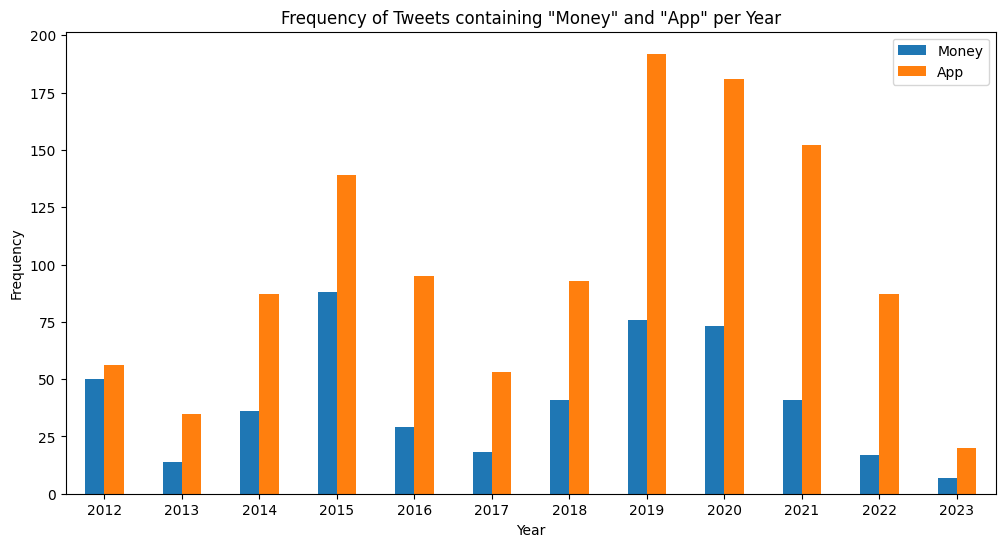

In [12]:
# Count the number of tweets containing each keyword for each year
freq_stats = sentiment_yearly.count()

# Plot the bar chart
ax = freq_stats.plot(kind='bar', figsize=(12,6), rot=0)
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Tweets containing "Money" and "App" per Year')
ax.legend(['Money', 'App'])
plt.show()
